In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0.,100.,size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0,10.,size=100)

2

In [3]:
def demean(X):
    return X - np.mean(X,axis=0)
X = demean(X)

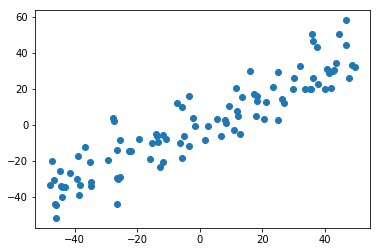

In [4]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [5]:
def f(w,X):
    return np.sum((X.dot(w)**2)) / len(X)
def df(w,X):
    return X.T.dot(X.dot(w)) * 2. / len(X)
def direction(w):
    return w / np.linalg.norm(w)
def first_component(X,initial_w,eta,n_iters=1e4,epsilon=1e-8):#给定X，它的第一主成分的坐标对应是多少
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w,X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if(abs(f(w,X)-f(last_w,X)) < epsilon): #epsilon表示函数值前后变化的最小值
            break
        cur_iter += 1
    return w

In [7]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X,initial_w,eta)
w

array([0.77288577, 0.63454518])

### 去掉第一主成分 同起点向量相减得到主成分向量的垂直向量

In [13]:
# X2 = np.empty(X.shape)
# for i in range(len(X)):
#     X2[i] = X[i] - X[i].dot(w) * w

# 对X2进行向量化操作
X2 = X - X.dot(w).reshape(-1,1) * w

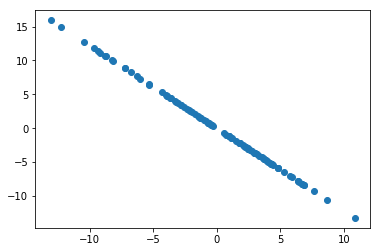

In [14]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [15]:
w2 = first_component(X2,initial_w,eta)
w2

array([ 0.63454983, -0.77288196])

In [16]:
w.dot(w2)

6.0048583144234335e-06

### 将以上内容合成一个函数,不断地对同一个矩阵进行垂直维度特征提取,得到前n个特征

In [21]:
def first_n_component(n,X,eta=0.01,n_iters=1e4,epsilon=1e-8):
    
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res=[]
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca,initial_w,eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1,1) * w
    return res

In [22]:
first_n_component(2,X)

[array([0.77288575, 0.63454521]), array([ 0.63454862, -0.77288294])]